In [11]:
import import_ipynb as ipynb
import os
from pathlib import Path
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

##### Change directories and load Lab 1

In [ ]:
os.chdir("../Lab 1")
lab_1 = ipynb.NotebookLoader().load_module('lab1')
os.chdir("../Lab 2")

In [8]:
training_set = [pd.read_pickle(_class) for _class in Path("../Lab 1/Binaries/Class dataframes").rglob("*.pkl")]

In [9]:
df = pd.concat(training_set, axis='rows', ignore_index=True)

In [10]:
df

,ax,ay,az,gx,gy,gz,class
0,0.066700,-0.497707,-9.903594,-0.007330,0.003054,-0.004123,Laying_down
1,0.021236,-0.492921,-9.970892,-0.007330,-0.001833,-0.000458,Laying_down
2,-0.007478,-0.500100,-10.028319,-0.004887,-0.015271,0.003207,Laying_down
3,-0.019442,-0.512064,-9.822238,-0.002443,-0.021380,0.006872,Laying_down
4,-0.050548,-0.524028,-9.800702,-0.000000,-0.007941,0.009315,Laying_down
...,...,...,...,...,...,...,...
9255,-4.175775,-9.944870,-0.786940,1.016450,-0.075134,-0.100637,Walking
9256,-4.398307,-11.419746,-1.720739,1.186265,0.442864,0.005650,Walking
9257,-2.854039,-12.147463,-2.383850,1.271784,0.937651,0.170579,Walking
9258,-0.661017,-11.979965,-3.434897,1.299883,1.327371,0.337951,Walking


In [15]:
X = df.drop('class', axis='columns')
y = df['class']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=100)

In [44]:
knn = KNeighborsClassifier()
k_range = list(range(1, 50))
param_grid = dict(n_neighbors=k_range)


In [45]:
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)


Fitting 10 folds for each of 49 candidates, totalling 490 fits


In [87]:
mean_test_score = pd.DataFrame(grid.cv_results_['mean_test_score'])

In [88]:
mean_test_score.rename({0: "Accuracy"}, axis='columns',inplace=True)
mean_test_score.index.names = ['k']

In [89]:
mean_test_score

,Accuracy
k,
0,0.999325
1,0.998785
2,0.998785
3,0.998650
4,0.998650
5,0.997975
6,0.997975
7,0.997840
8,0.997840


<Axes: title={'center': 'Accuracy'}, xlabel='k'>

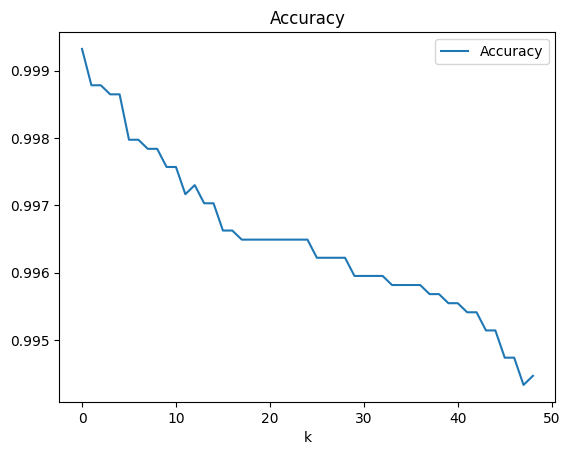

In [90]:
mean_test_score.plot(title = 'Accuracy')